# 📦 Customer Sentiment Analysis – Flipkart Product Reviews
---


## 🎯 Project Objective  

The aim of this project is to analyze **Flipkart product reviews (~500 rows)** using **Sentiment Analysis**.
We classify customer feedback into **Positive, Negative, and Neutral sentiments** and generate meaningful insights with **data visualizations and text analytics**.

---



### 🛠️ Technologies & Libraries Used

| Tool / Library    | Purpose                                                                 |
|------------------|-------------------------------------------------------------------------|
| `Pandas`          | Clean, structure, and analyze review data                              |
| `TextBlob`      | Conduct sentiment scoring                                                |
| `Matplotlib`, `Seaborn` | Visualization (bar, pie, scatter) and Advanced visualization      |
| `WordCloud`       | Display frequent terms in positive/negative reviews for insight mining |

## 📊 Project Workflow
1. **Data Preprocessing**
 - Check for duplicates and missing values. 


In [4]:
import pandas as pd 

In [11]:
df = pd.read_csv("flipkart_reviews.csv")
df

,Product_Name,Review,Rating,Summary
0,iPhone 13,Amazing phone with great camera,5,Great product
1,Samsung Galaxy S21,"Battery drains quickly, not satisfied",2,Poor battery
2,Redmi Note 10,"Value for money, excellent performance",4,Worth it
3,HP Laptop,Keyboard quality is poor,2,Bad keyboard
4,Nike Shoes,"Very comfortable shoes, loved it",5,Loved the shoes
...,...,...,...,...
495,Woodland Boots,"Works well, no major issues.",4,Good
496,Boat Rockerz Headphones,Performance is below average.,2,Not Great
497,Dell Inspiron,Absolutely love it!,5,Highly Recommended
498,Canon DSLR Camera,Exceeded my expectations.,5,Perfect


In [12]:
df.describe()

,Rating
count,500.000000
mean,4.056000
std,1.076653
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_Name  500 non-null    object
 1   Review        500 non-null    object
 2   Rating        500 non-null    int64 
 3   Summary       500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


🧠 2. **Sentiment Analysis**

Tool Used: `TextBlob`

---

**Objective:**  
To evaluate each customer review’s tone and emotional leaning using sentiment polarity scores, allowing us to classify and quantify customer satisfaction.

---

**Steps Performed:**

- **Polarity Calculation:**  
  Used `TextBlob` to assign a **polarity score** to each sentence within a review, ranging from **-1.0 (very negative)** to **+1.0 (very positive)**.
  
- **Sentiment Classification:**  
  Reviews were categorized based on the calculated polarity:

  | Sentiment Class         | Polarity Range     |
  |--------------------------|--------------------|
  | Positive                 | Polarity > 0      |
  | Neutral                  | Polarity = 0                |
  | Negative                 | Polarity < 0 |

 **Result Storage:**  
  The computed **polarity** and the corresponding **sentiment class** were stored as new columns (`Polarity`, `Sentiment_Class`) in the dataset for further visualization and insight extraction.


In [17]:
#📌 Step 1: Import libraries
import pandas as pd 
import matplotlib as plt 
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [18]:
!pip install TextBlob

In [19]:
#📌 Step 2: Sentiment analysis with TextBlob

df['Polarity'] = df['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment_class'] = df['Polarity'].apply(classify_sentiment)
print(df[['Product_Name','Review', 'Polarity', 'Sentiment_class']].head(10))


             Product_Name                                  Review  Polarity  \
0               iPhone 13         Amazing phone with great camera     0.700   
1      Samsung Galaxy S21   Battery drains quickly, not satisfied    -0.250   
2           Redmi Note 10  Value for money, excellent performance     1.000   
3               HP Laptop                Keyboard quality is poor    -0.400   
4              Nike Shoes        Very comfortable shoes, loved it     0.610   
5         Sony Headphones          Sound quality is crystal clear     0.250   
6  Whirlpool Refrigerator                Cooling is not efficient     0.000   
7               iPhone 14          Doesn’t match the description.     0.000   
8          Woodland Boots                     Absolutely love it!     0.625   
9       Samsung Microwave          Highly recommend this product.     0.160   

  Sentiment_class  
0        Positive  
1        Negative  
2        Positive  
3        Negative  
4        Positive  
5        P

### 📊 4. Data Analysis & Insights

**Tools Used:** `Pandas`, `Matplotlib`, `Seaborn`, `WordCloud`

---

**Goal:**  
To visually explore and extract actionable insights from customer sentiment data by analyzing trends in polarity, rating, and word usage.

---

#### 🔹 1. Sentiment Distribution (Pie Chart) & Rating Distribution (Bar Chart)

- Visualized the count of reviews in each sentiment class (positive, negative, neutral, etc.).
- Helped in understanding the overall emotional tone customers expressed toward the products.
- Majority of reviews were **positive**, with a noticeable number of negative and a neutral opinions.

---

#### 🔹 2. Rating vs Sentiment Polarity (Scatter Plot)

- Compared **numerical star ratings** (1–5) with calculated **sentiment polarity**.
- Confirmed a **strong relationship**: higher-rated reviews generally had more **positive polarity**, validating the sentiment analysis results.

---

#### 🔹 3. Word Cloud (Text Frequency Insight)

- Generated separate **word clouds** for:
  - ✅ **Positive reviews** (Polarity > 0)
  - ❌ **Negative reviews** (Polarity < 0)


- Common positive terms: *best purchase, fantastic quality, highly recommend*  
- Common negative terms: *Completely useless, worst performance, terrible product*
- This helped identify frequently discussed product features and customer pain points.

---

**Outcome:**  
These insights form a foundation for product strategy and customer experience improvements, linking **textual reviews to structured feedback metrics** like rating and sentiment.

In [21]:
# Count sentiment class
counts = (df['Sentiment_class'].value_counts())
print(counts)

Sentiment_class
Positive    340
Negative     80
Neutral      80
Name: count, dtype: int64


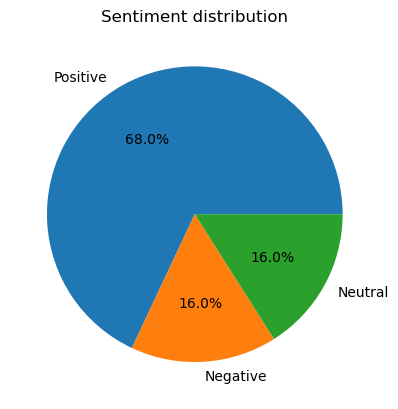

In [22]:
#Pie chart
import matplotlib.pyplot as plt
import numpy as np
sentiment = ['Positive', 'Negative', 'Neutral']
plt.pie(counts, labels = sentiment, data = df,autopct='%1.1f%%')
plt.title("Sentiment distribution")
plt.show()

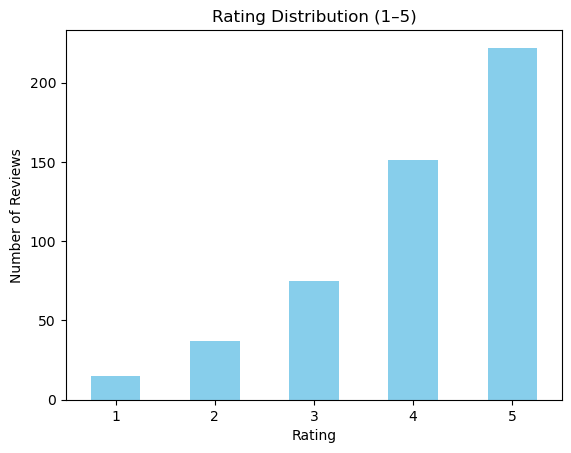

In [29]:
#Rating distribution
plt.figure()
df["Rating"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Rating Distribution (1–5)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

C:\Users\palak\AppData\Local\Temp\ipykernel_20788\2842125381.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_class', data=df, palette="viridis")


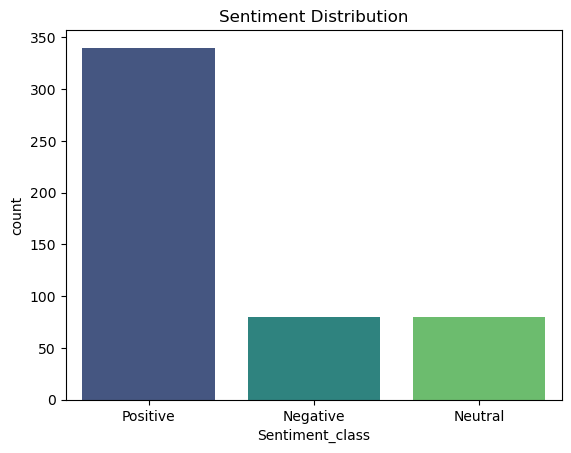

In [23]:
#Count plot
import matplotlib.pyplot as plt
import numpy as np
sns.countplot(x='Sentiment_class', data=df, palette="viridis")
plt.title("Sentiment Distribution")
plt.show()


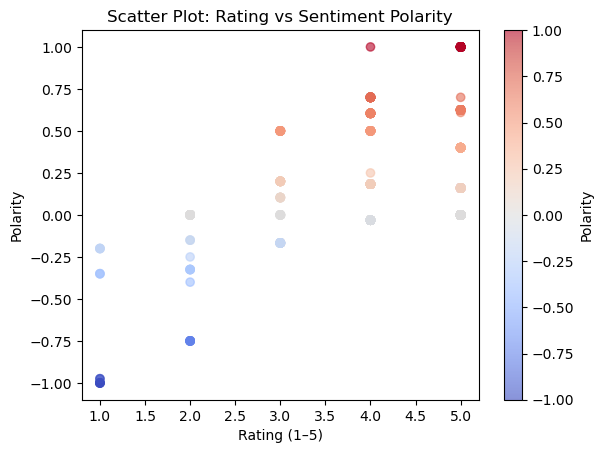

In [24]:
#Scatter Plot
plt.scatter(df['Rating'], df['Polarity'], alpha=0.6,  c=df['Polarity'], cmap='coolwarm')
plt.xlabel("Rating (1–5)")
plt.ylabel("Polarity")
plt.title("Scatter Plot: Rating vs Sentiment Polarity")
plt.colorbar(label="Polarity")
plt.show()

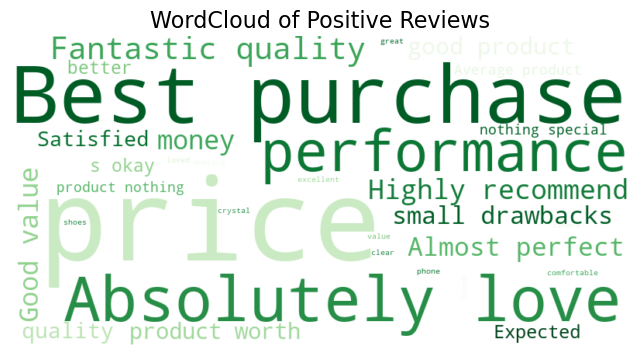

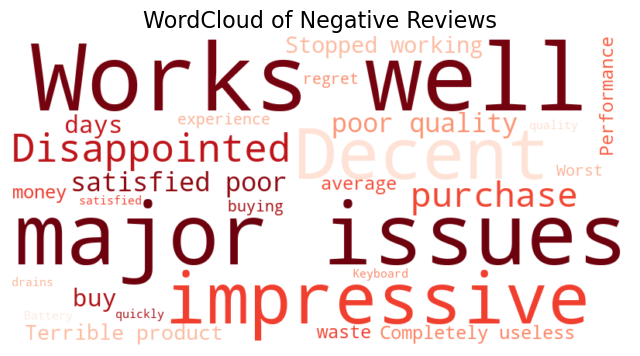

In [26]:
#Filter Positive and Negative Reviews
positive_reviews = " ".join(df[df['Sentiment_class'] == 'Positive']['Review'])
negative_reviews = " ".join(df[df['Sentiment_class'] == 'Negative']['Review'])

#WordCloud for Positive Reviews
plt.figure(figsize=(8,6))
wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_reviews)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Positive Reviews", fontsize=16)
plt.show()

#WordCloud for Negative Reviews
plt.figure(figsize=(8,6))
wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Negative Reviews", fontsize=16)
plt.show()
